In [55]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Ejercicio 7

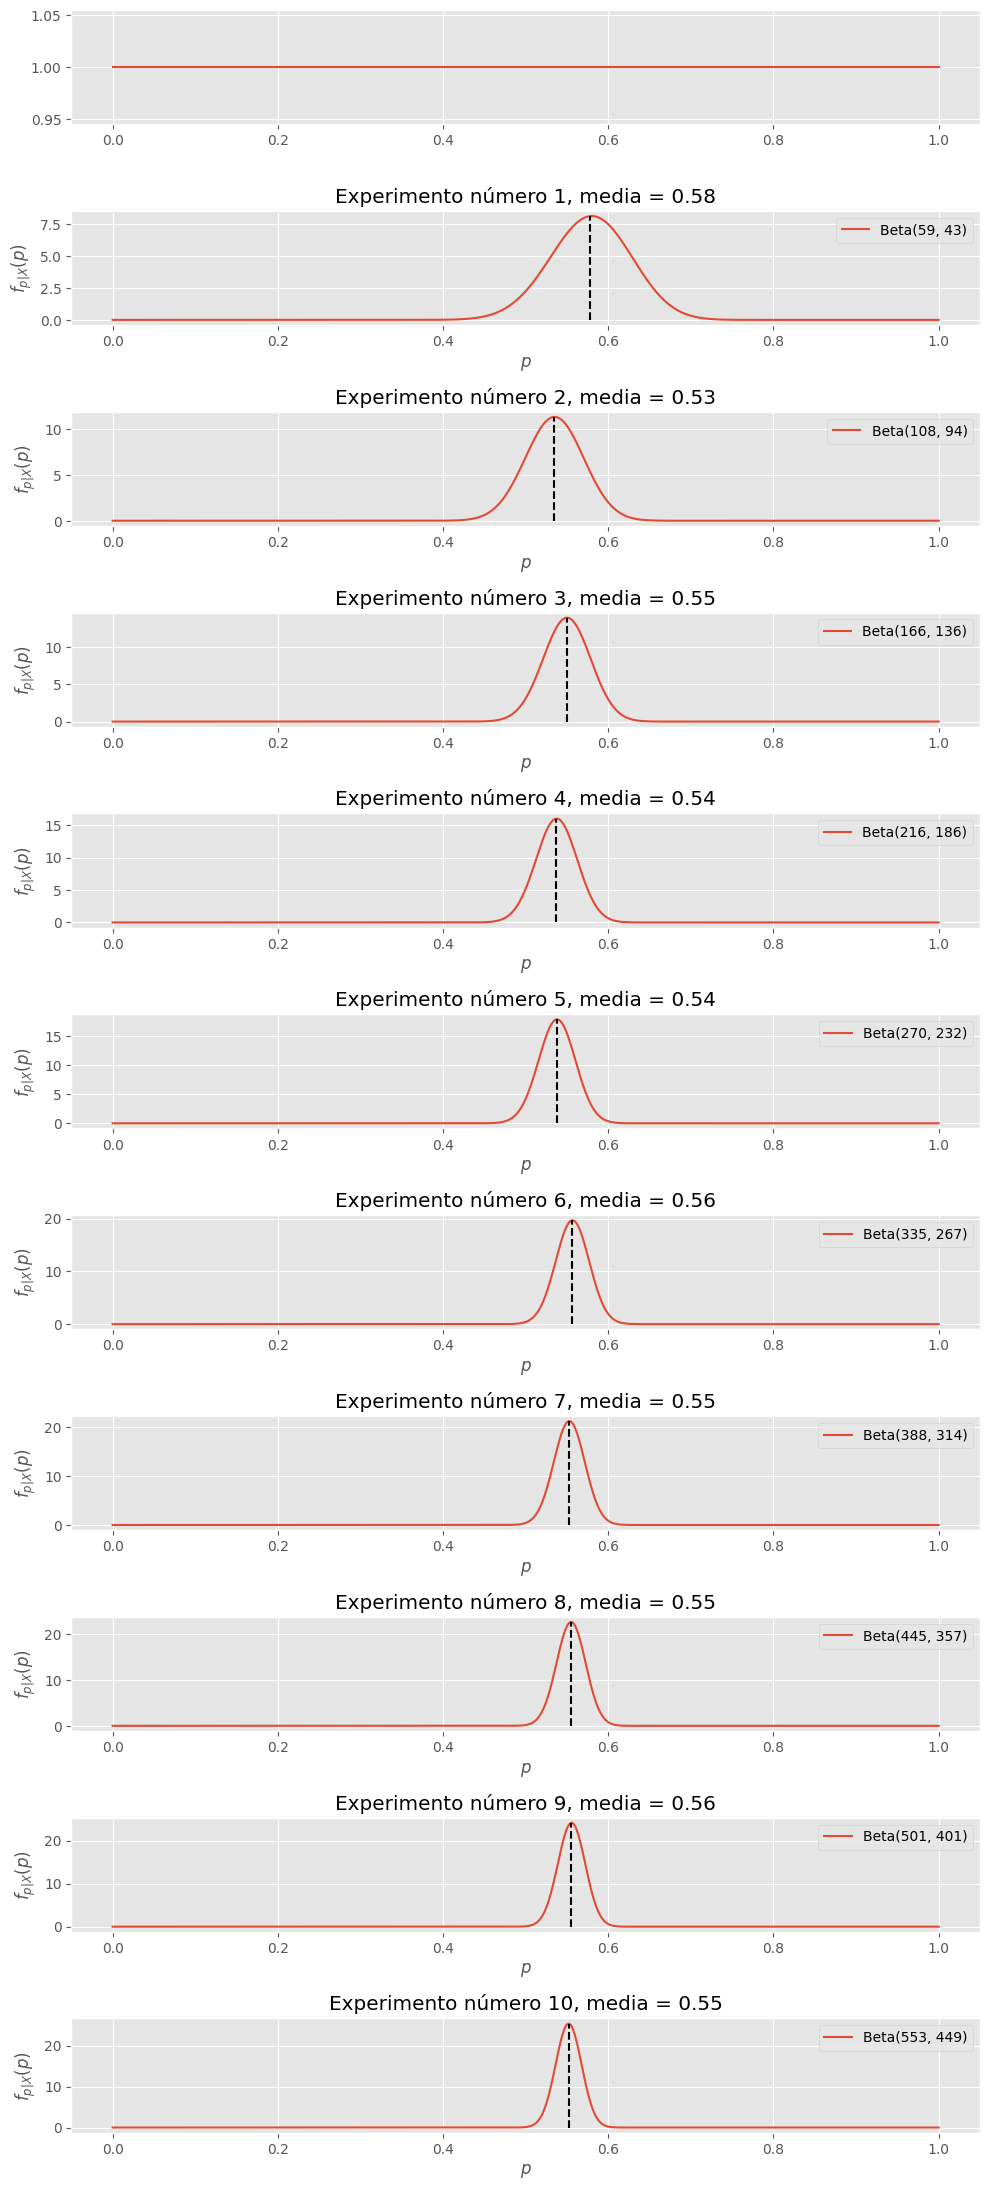

In [9]:


def plot_beta(a, b, experiment_number, ax):
    x = np.linspace(0, 1, 1000)
    y = beta.pdf(x, a, b)
    media = beta(a,b).mean() 
    ax.plot(x, y, label=f'Beta({a}, {b})')
    ax.set_title(f'Experimento número {experiment_number}, media = {media:2.2f}')
    ax.set_xlabel('$p$')
    ax.vlines(x=media,ymin=y.min(),ymax=y.max(),colors='k',linestyle='dashed')
    ax.set_ylabel('$f_{p|X}(p)$')
    ax.legend()

a, b = 1, 1

p_true = 0.55

n_flips = 100

num_experiments = 10

means = []

fig, axes = plt.subplots(nrows=num_experiments+1, figsize=(10, 2 * (num_experiments+1)))

axes[0].plot(np.linspace(0,1,100),np.repeat(1,100))

for i in range(num_experiments):
    x = np.random.binomial(n_flips, p_true)

    a += x
    b += n_flips - x

    mean = a / (a + b)
    means.append(mean)

    plot_beta(a, b, i+1, axes[i+1])

plt.tight_layout()
plt.show()





Text(0, 0.5, '$\\mathbb{E}[P|X]$')

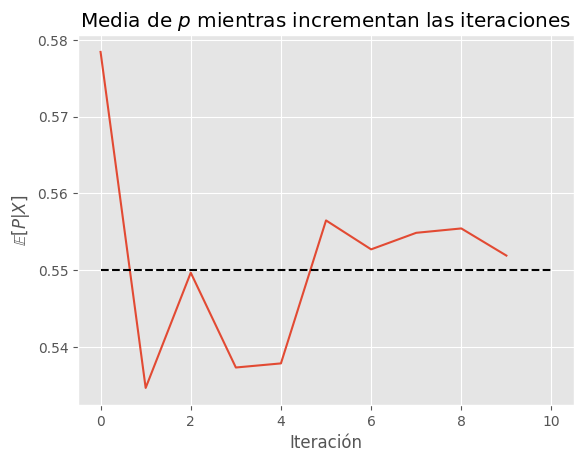

In [13]:
plt.plot(np.arange(num_experiments),means)
plt.title('Media de $p$ mientras incrementan las iteraciones')
plt.hlines(y=p_true,xmin=0,xmax=num_experiments,colors='k',linestyles='dashed')
plt.xlabel('Iteración')
plt.ylabel('$\\mathbb{E}[P|X]$')


# Ejercicio 8

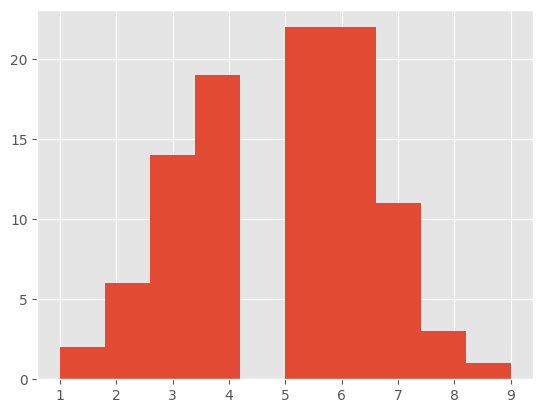

In [19]:
import scipy.stats as st

n=10
m=100
binomial = st.binom(p=0.5,n=10)
simulaciones = binomial.rvs(size=m)
plt.hist(simulaciones);

In [48]:

binomial = st.binom(p=p_true,n=n)
simulaciones = binomial.rvs(size=m)

def L_p_X(p,simulaciones):
    binomial = st.binom(p=p,n=n)
    evals_pmf = binomial.pmf(simulaciones)
    return np.prod(evals_pmf)
   

p_arreglo=np.linspace(0,1,100)   
L_p_lista = [L_p_X(pi,simulaciones=simulaciones) for pi in p_arreglo]

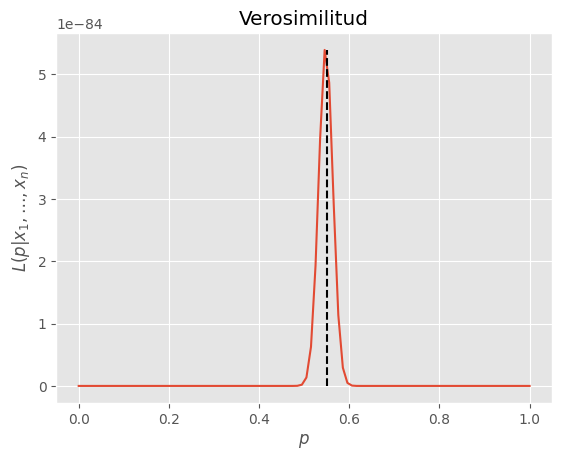

In [54]:
plt.title('Verosimilitud')
plt.xlabel('$p$')
plt.ylabel('$L(p|x_1,\\ldots,x_n)$')
plt.plot(p_arreglo,L_p_lista)
plt.vlines(x=0.55,ymin=0,ymax=max(L_p_lista),colors='k',linestyles='dashed');